# Joint angle encodings

In this notebook I will test different options on how the trajectory (represented by joint angles in time) can be encoded to serve as input to a recurrent spiking network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

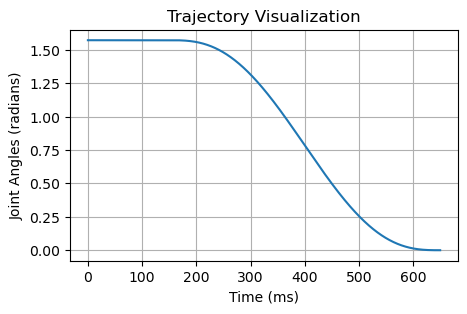

In [2]:
# Load one trajectory from a file
# The file contains the trajectory data represented as joint angles in radians per time step of 0.1 ms
trajectory = np.loadtxt("trajectory1.txt")
timestamp = np.arange(0, trajectory.shape[0] * 0.1, 0.1)

# Visualize the trajectory
plt.figure(figsize=(5, 3))
plt.title("Trajectory Visualization")
plt.xlabel("Time (ms)")
plt.ylabel("Joint Angles (radians)")
plt.plot(timestamp, trajectory)
plt.grid()

## Radial basis function

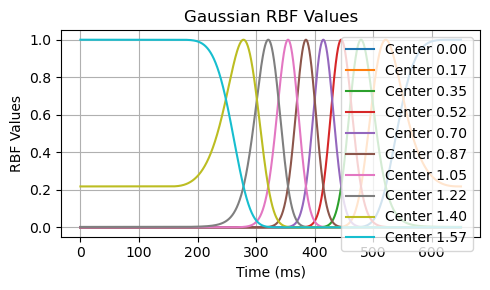

In [ ]:
def gaussian_rbf(x, center, width):
	"""Gaussian Radial Basis Function."""
	return np.exp(-((x - center) ** 2) / (2 * width ** 2))

# The trajectory is a 1D array of joint angles in radians against time
# We will compute the Gaussian RBF for each joint angle
num_joints = trajectory.shape[0]
num_centers = 10
# Define the centers of the RBFs in radians
# The centers are evenly spaced between 0 and pi/2
# The width of the RBFs is set to 0.5 radians
centers = np.linspace(0, np.pi/2, num_centers)
width = 0.5
# Initialize the RBF values array
rbf_values = np.zeros((trajectory.shape[0], num_centers))
# Compute the RBF values for each joint angle
for i in range(num_centers):
	rbf_values[:, i] = gaussian_rbf(trajectory, centers[i], width)

# Visualize the RBF values
plt.figure(figsize=(5, 3))
plt.title("Gaussian RBF Values")
plt.xlabel("Time (ms)")
plt.ylabel("RBF Values")
for i in range(num_centers):
	plt.plot(timestamp, rbf_values[:, i], label=f'Center {centers[i]:.2f}')
plt.legend()
plt.grid()
plt.tight_layout()

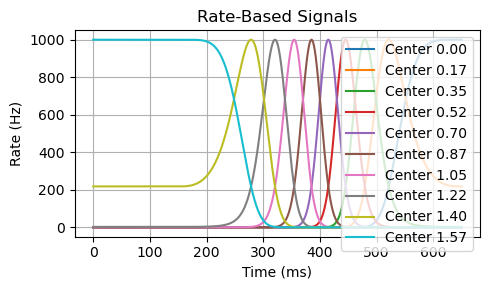

In [6]:
# Generate rate-based signals from RBF values
rate_based_signals = rbf_values * 1000  # Convert to Hz

# Visualize the rate-based signals
plt.figure(figsize=(5, 3))
plt.title("Rate-Based Signals")
plt.xlabel("Time (ms)")
plt.ylabel("Rate (Hz)")
for i in range(num_centers):
	plt.plot(timestamp, rate_based_signals[:, i], label=f'Center {centers[i]:.2f}')
plt.legend()
plt.grid()
plt.tight_layout()
